In [206]:
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import simps


from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline


<h1>Computational Phyiscs Project 3: 

Partial Differential Equations in Physics<h1>

<h3>I. LAPLACES'S EQUATION IN TWO-DIMENSIONS:<h3>

In this project, we explore three important and widely studied partial differential equations
in physics: Laplace’s equation, Poisson’s equation and diffusion equation. In the process, we
will learn how to numerically approach boundary value problems in more than one spatial
dimension as well as problems that have both initial and boundary values

We begin with a problem to compute the electric potential with no charges, so that Poisson’s
equation reduces to Laplace’s equation. Consider a rectangular region of length Lxand Ly
where the electric potential is subject to the boundary conditions

$V(x, y = 0) = 0, V(x, y = 0) = 0, V(x = L_x , y) = 0$        

and 
        
$V(x, y = L_y) = f(x) = V_0\exp{[-(x - L_x/2)^2/a^2] }$          

where f(x) is the user-specified function of x that gives the potential at the upper edge, and
$a > L_x$ is a real constant that you are free to choose to make plots look ‘nice’.





**Question 1**

Write a program to solve the problem using the relaxation method until the maximum
difference between successive iterations is less than $10^{−5}$ V. Again, your code should work
with any ‘reasonable’ $f(x)$ and any box aspect ratio $L_y/L_x$.


In [207]:

def Laplace_solver(v_0,a, lenX, aspect_ratio, N, contour3D, plot): #this is the solver for a particular boundary

    '''
    
       This function executes a relaxation routine for La places equation. If any reasonable boundary condition 
       is given in the 'f(x)' function then this code should return a 3D plot or a countour plot of the potential. 

       TO RETURN 3D PLOT ENTER: countour3D = True  note: this requires just a boolean

       T0 RETURN A CONTOUR PLOT ENTER: contour3D = False

       Note: Question 3 askes to plot a CONTOUR of a (1:1) apsect ratio

    '''
    def f(x): #function that defines the boundary condition, this can be changed to any resonable function
        return  v_0 * np.exp((-(x - lenX/2)**2)/a**2)

    #calculating lenY from lenX and the aspect ratio
    lenY = lenX * aspect_ratio

    #initializing xaxis array, and previous and current solution array
    x_axis = np.linspace(0, lenX, N + 1)
    y_axis = np.linspace(0,lenY, N + 1)
    v_curr = np.zeros((len(x_axis),len(y_axis)))
    v_prev = np.zeros((len(x_axis),len(y_axis)))

    #Setting voltage tolerence, we kill the relaxation when our difference in solutions are smaller then this value
    dv_tol = 10**(-6)


    #initial conditions
    
    #I changed this to show wheither or not i was actually accesseing the boundary 
    # v_curr[:, len(y_axis) - 1] = f(x_axis) 
    # v_prev[:, len(y_axis) - 1] = f(x_axis)

    v_curr[:,  - 1] = f(x_axis)
    v_prev[:,  - 1] = f(x_axis)

    dv = 1

    #run the relaxation routine here
    while dv> dv_tol: 
        for i in range( 1, N): 
            for j in range(1,N): 
                v_curr[i,j] = (v_prev[i + 1, j] + v_prev[i - 1, j] + v_prev[i, j + 1] + v_prev[i, j - 1])/4
        
        dv = np.amax(abs(v_curr - v_prev))
        v_prev = v_curr + 0.0 

    if plot:
        #if we want a 3D plot this if statement will run
        if contour3D:

            # #setting figure size, axis projection, and showing the plot
            # fig = plt.figure(figsize=(12,15))
            # ax = plt.axes(projection='3d')
            # ax.contour3D(x_axis, y_axis, v_curr,150)
            # plt.xlabel('Position in x')
            # plt.ylabel('Position in y')
            # #plt.zlabel('Voltage')
            # plt.title(f'Plot of LaPlaces Equation with imposed Guassian boundary conditions, aspect ratio = (1 : {aspect_ratio})')


            X, Y = np.meshgrid(x_axis, y_axis) 
            fig = plt.figure(figsize=(10,10))
            ax1 = fig.add_subplot(111, projection='3d')


            # x = np.arange(-5,5,0.1)
            # y = np.arange(-5,5,0.1)
            # X,Y = np.meshgrid(x,y)
            # Z = X*np.exp(-X**2 - Y**2)


            mycmap = plt.get_cmap('cool')
            ax1.set_title(f'Plot of LaPlaces Equation with imposed Guassian boundary conditions, aspect ratio = (1 : {aspect_ratio})')
            surf1 = ax1.plot_surface(X, Y,v_curr , cmap=mycmap)
            fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
            plt.xlabel('x distance (cm)', fontsize = '12' )
            plt.ylabel("y distance (cm)", fontsize = '12')

        #if we want to plot a contour plot, then this conditional statement will trigger
        else: 
            # Set colour interpolation and colour map
            colorinterpolation = 50
            colourMap = plt.cm.coolwarm #you can try: colourMap = plt.cm.jet

            #setting x and y axis for these plots
            x = np.linspace(0,1,N + 1)
            y = np.linspace(0, 1,N + 1)

            # Configure the contour
            plt.title(f"Contour of Potential with aspect ratio (1:{aspect_ratio})")
            plt.contourf(x_axis, y_axis, v_curr, colorinterpolation, cmap=colourMap)
            plt.xlabel('x distance (cm)', fontsize = '12' )
            plt.ylabel("y distance (cm)", fontsize = '12')

            # Set Colorbar
            plt.colorbar()

            #ploting the contour for our potential, this shows us the equipotential lines. 
            plt.contour(x_axis, y_axis, v_curr)

            # Show the result in the plot window
            plt.show()

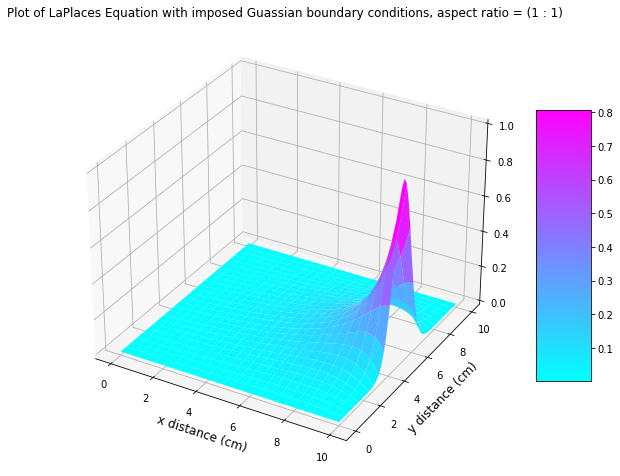

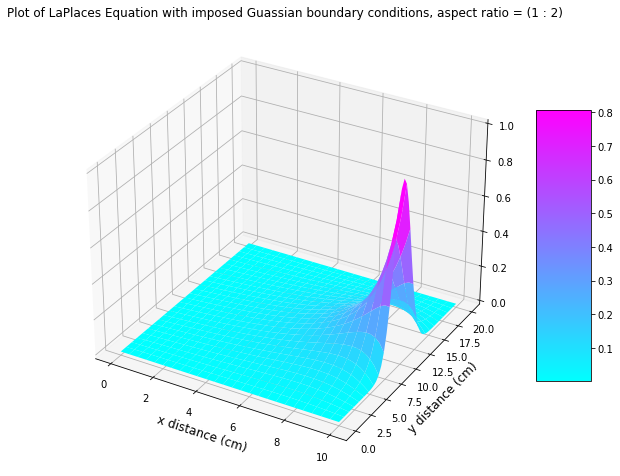

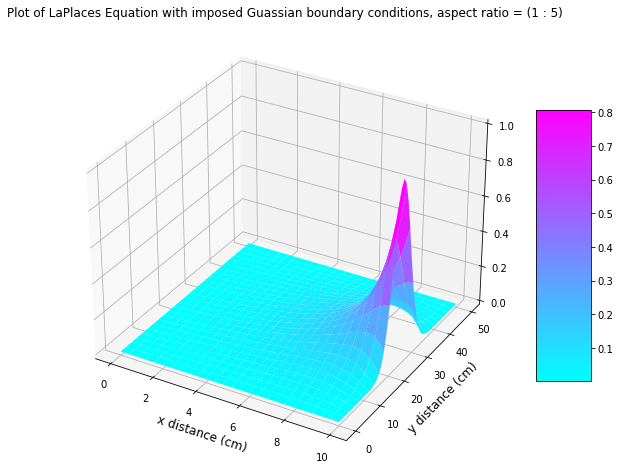

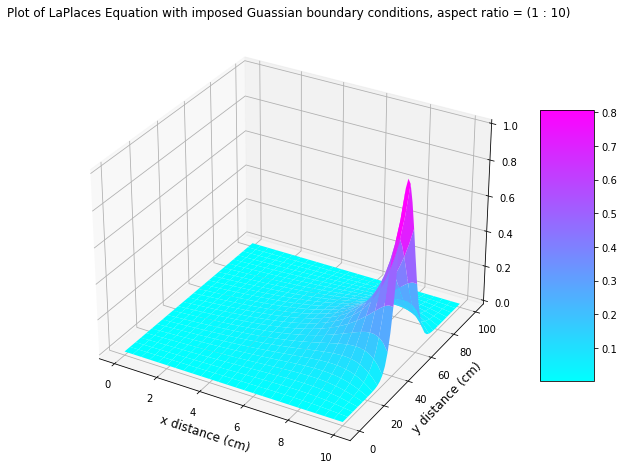

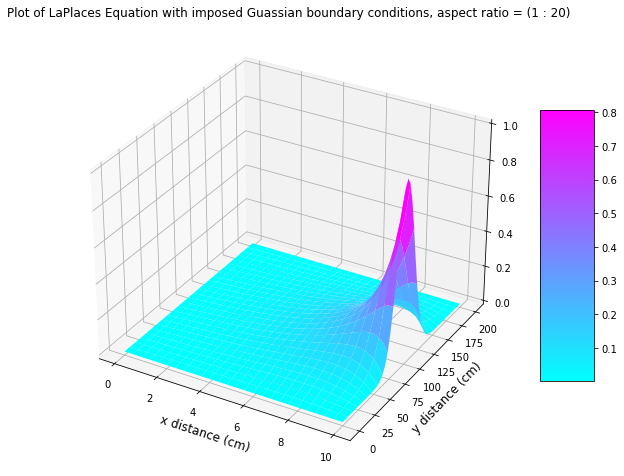

In [208]:
#current plotting values 

v0 = 1 #initial height of the guassian, volts
a = 1  # this is kind of like the standard deviation of the gaussian
lenX = 10 #this is the length of the x-axis to drive the aspect ratio
N = 10 #number of points on each axis


for aspect_ratio in [1, 2, 5, 10, 20]:  
    
    Laplace_solver(v0, a, lenX, aspect_ratio, 50, contour3D = True, plot = True)

**Question 2**

 Make three-dimensional plots of your numerical solutions for box aspect ratios Ly/Lx =
1,2,5,10 and 20. How does the solution change as Ly/Lx increases?





**Question 3**

For the Ly/Lx = 1 case, extend your code to make a contour plot and indicate several
equipotential surfaces. Trace out the approximate trajectories (by hand is sufficient) of
positive point charges that all start at y = Ly but with different initial x-positions. Please pick some points on each side of the center x = Lx/2 and assume the charges begin at rest.


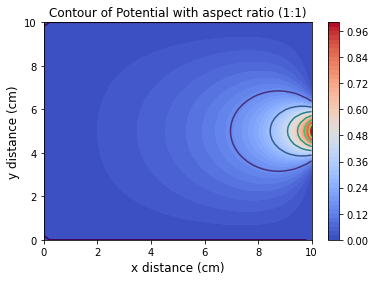

In [209]:
aspect_ratio = 1
# here were are plotting a contour of the potential with equipotential lines plotted


Laplace_solver(v0, a, lenX, aspect_ratio, 50, contour3D = False, plot = True)

**Caption:**

This is contour plot of the sclar potential, the contour lines indicate equipotential lines, when the lines are more packed together we can see that the gradient is higer which means that the field is stroger in this area. 

We use this contour plot to gain information of our potential in certain areas. 

**WRITEMORE**

<h3>II. POISSON'S EQUATION<h3>


Next, we add a (possibly position dependent) charge density ρ to the region so that the
electrostatic potential is governed by the Poisson’s equation

$\vec{\nabla}^2V$ = $-4\pi\rho$

Consider a square region of side length L grounded on all four edges. That is, 

$V(x = 0, y) = V(x = L, y) = V(x, y = 0)=V(x, y = L) = 0$

For convenience we wrote Poisson’s equation in CGS units so that charge is measured in
statcoulombs, distance is in cm and unit of potential is statvolts. You are welcome to, but
do not need to, look up these units in terms of familiar MKS quantities.

**Question 1**

Note that unlike our discretized Laplace’s equation, the grid size ∆ no longer drops out
of the finite-difference equation. Please provide a brief physical explanation.

I answered this in depth on the attatched PDF. **THE LONG SHORT OF IT IS, POISSON EQUATION LOOKS AT CURAVTURE OF ALL SPACE, OR COMPUTATIONAL GRID. IF WE DO ACCOUNT FOR THE SPACING WE MIGHT MISS SOME CURVATURE.**


**Question 2**

Let $\rho$ be two equal but opposite square charges each occupying one grid zone and centered
at positions along the diagonal of the grid, equally distant from the center. The charge
densities are therefore

$\rho = \pm{1}\mathrm{\frac{statcoulomb}{cm^3}}$,

uniformly distributed over a single grid zone. Create an array that encodes this charge
distribution. Your code should allow for user-specified $\rho_0$ and distance d between charges,
subject to the constraint that the charges do not physically touch

In [210]:
#I have hard coded this charge distribution to be a square grid
#I also made this function return a dipole distribution

def P(p0, d, lenXY):

    """
        This function creates a electric dipole charge distribution for any size array or computational grid. 
        I have hard coded this into my Poisson solver because this is what the question epecifically asks for, but 
        given any resonible distribution with boundary conditions the in place of this function, the solver should still run.

        d = is the distance from the center to the charge, so 2*d would be the distance between the two charges. 
        p0 = the inital strength of the charges
        lenXY  = is the size of the square grid that I want to build.

    """

    rho = np.zeros((lenXY, lenXY))

    #here we are subjected to the constraint that the charges cannot actually touch
    if d == 0: 

        return("THIS CODE WILL NOT RUN. WE ARE SUBJECTED TO THE CONSTRAINT THAT THE CHARGES CANNOT ACTUALLY TOUCH! Make sure 'd' does not equal 0. ")
    if d > lenXY:
        return("THIS CODE WILL NOT RUN. WE ARE SUBJECTED TO THE CONSTRAINT THAT THE CHARGES MUST BE ON THE GRID. CHARGES ARE TO FAR APART. ADJUST INITAL 'd' ")


    elif  int(rho.size) % 2 == 0:  #if even there are two middle indexes

        middle = int(lenXY/2)
        rho[(middle - 1) - d, (middle - 1) - d] = p0
        rho[middle + d, middle + d] = - p0

    else: 
        middle = int(lenXY/2 )
        rho[middle - d, middle - d] = p0
        rho[middle + d, middle + d] = - p0 

    return rho


def Poisson_solver(p0, d, lenXY, N, contour3D): #this is the solver for a particular boundary

    '''
    
       This function executes a relaxation routine for Poisson's equation. If any reasonable boundary condition 
       is given then this code should return a 3D plot or a countour plot of the potential. 

       I have set the the boundary of my computational grid to be zero on each side (grounded). 

       TO RETURN 3D PLOT ENTER: countour3D = True  note: this requires just a boolean

       T0 RETURN A CONTOUR PLOT ENTER: contour3D = False

    '''


    #initializing xaxis and yaxis array, and previous and current solution array
    square = np.linspace(0, lenXY, N + 1)
    v_curr = np.zeros((len(square),len(square)))
    v_prev = np.zeros((len(square),len(square)))

    for d in [d, d + 5, d + 8]:
        #initial boundary conditions, box is grounded on each side
        v_curr[:, -1] = 0
        v_curr[:, 0]  = 0
        v_curr[0, :]  = 0
        v_curr[-1, :] = 0

        v_prev[:, -1] = 0
        v_prev[:, 0]  = 0
        v_prev[0, :]  = 0
        v_prev[-1, :] = 0

        h = lenXY/N
        #this array holds the uniormly distributed square charges
        rho = P(p0, d, N + 1)

        #Setting voltage tolerence, we kill the relaxation when our difference in solutions are smaller then this value

        dv_tol = 10**(-6) #units of statvolts

        #start my tolerance counter
        dv = 1

        #run the relaxation routine here
        while dv> dv_tol: 
            for i in range(1, N ): 
                for j in range(1, N): 
                    v_curr[i,j] = (v_prev[i + 1, j] + v_prev[i - 1, j] + v_prev[i, j + 1] + v_prev[i, j - 1] + ((h**2)*rho[i, j]))/4
            
            dv = np.amax(abs(v_curr - v_prev))
            v_prev = v_curr + 0.0 



        #if we want a 3D plot this if statement will run
        if contour3D:

            #setting figure size, axis projection, and showing the plot
            # fig = plt.figure(figsize=(12,15))
            # ax = plt.axes(projection='3d')
            # ax.contour3D(square, square, v_curr,150)

            X, Y = np.meshgrid(square, square) 
            fig = plt.figure(figsize=(10,10))
            ax1 = fig.add_subplot(111, projection='3d')

            cset = ax1.contourf(X, Y, v_curr, zdir='z', offset=np.min(v_curr), cmap=cm.jet)
        

            mycmap = plt.get_cmap('cool')
            ax1.set_title(f"3D Contour of Potential d = {str(d)} cm")
            surf1 = ax1.plot_surface(X, Y,v_curr, alpha=0.7, cmap=mycmap)
            fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
            plt.xlabel('x distance (cm)', fontsize = '12' )
            plt.ylabel("y distance (cm)", fontsize = '12')
            
            ax1.set_zlabel('Voltage (StatVolts)')


        #if we want to plot a contour plot, then this conditional statement will trigger
        else: 
            # Set colour interpolation and colour map
            colorinterpolation = 100
            colourMap = plt.cm.cool #you can try: colourMap = plt.cm.jet
            
            
            # Configure the contour
                     
            plt.title(f"2D Contour of Potential d = {str(d)} cm")
            plt.xlabel("x distance (cm)", fontsize = '12')
            plt.ylabel("y distance (cm)", fontsize = '12')

            plt.contourf(square, square, v_curr, colorinterpolation, cmap=colourMap)

            # Set Colorbar
            cbar = plt.colorbar()
            cbar.set_label('Voltage (StatVolts)', fontsize=  '12')

            #ploting the contour for our potential, this shows us the equipotential lines.
            #plt.contour(square, square, v_curr)

            # Show the result in the plot window
            plt.show()

    return v_curr

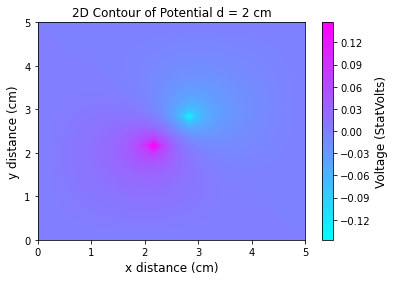

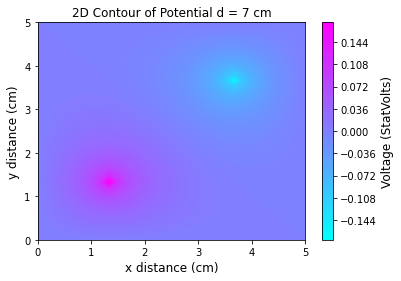

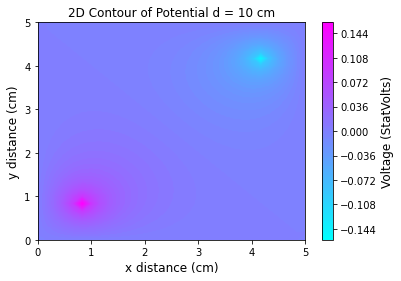

In [211]:
p0        =  10 #initial charge value in statcoulombs 
d         =  2  # distance of the charges from each other
lenXY     =  5  #physical length scale
N         =  30 #number of steps
contour3D =  False  #FALSE for conutour True for 3D plot


a = Poisson_solver(p0, d, lenXY, N, contour3D)

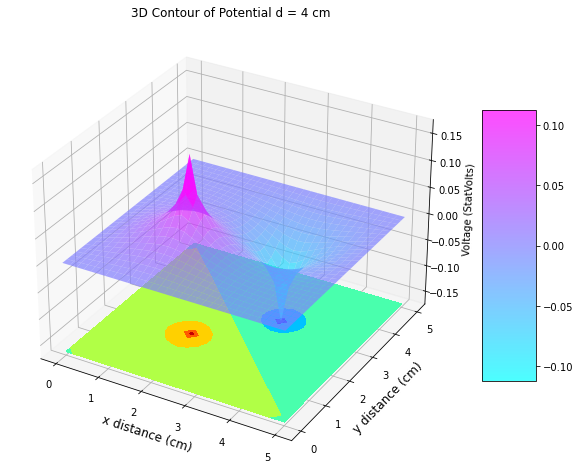

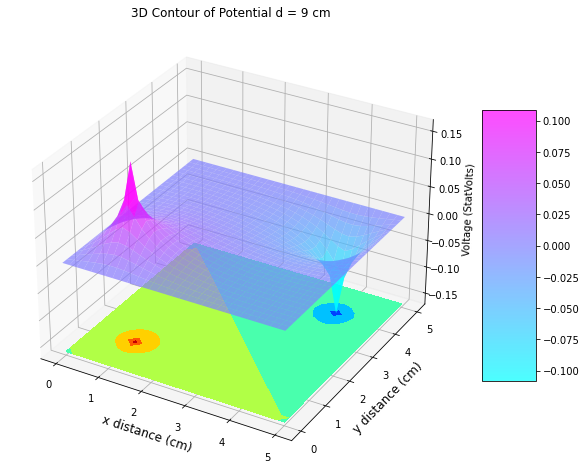

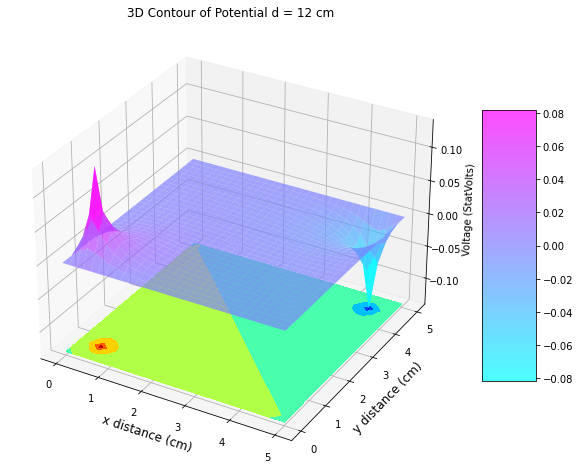

In [212]:
p0        =  10
d         =  4 # distance of the charges from each other
lenXY     =  5
N         =  30
contour3D =  True

a = Poisson_solver(p0, d, lenXY, N, contour3D)

<h3>III. Diffusion Equation<h3>

Consider the diffusion equation in two-dimensions

$\frac{\partial \xi}{\partial t} = D\vec{\nabla}^2\xi = D\left(\frac{\partial^2 \xi}{\partial x^2} + \frac{\partial^2 \xi}{\partial y^2}\right)$

**Question 1**

Consider the two-dimensional diffusion equation using FTCS (FORWARD TIME CENTRAL SPACE) method for the initial condition 

$\xi(\vec{r},t = 0) = A\delta^2(\vec{r})$

where $A$ could, for example, represent the total number of particles. What are the boundary condistions and how will you impement them computationally?

**ANSWER THIS QUESTION ON MARKDOWN AND THE PDF DOCMUNENT**

**Question 2**

Write a program to obtain solutions for $D = 0.18  \frac{cm^2}{s}$ and $ 2*10^{-5}\frac{cm^2}{s}$, which are approximately the diffusivity of oxygen in air and in water, respectively, at room temperature and atmospheric pressure. 

For each case, please explain how you chose the position and time
step sizes as well as the size of the computational domain (in both space and time).



In [223]:
def Diffusion(M,N,xf,tf,D,contour3D, plot):

    dt=tf/N #N in the number of timesteps

    x = np.linspace(-xf,xf, M + 1)
    y = np.linspace(-xf,xf, M + 1)


    dx = xf/M   #M is the number of position steps

    
    #constant, with diffusion coefficent informaiton
    gamma = (D*dt/dx**2) #stability gamma < 0.5
    

    if gamma > 0.5: 

        return " ValueError: Stability condition has be broken! Please check time and space stepsizes"

    if D == 0.18: 
        a = "Diffusifity of oxygen in air"

    elif D == 2*10**(-5):
        a = "Diffusivity of oxygen in water"

    else: 
        a = 'Diffusivity constant'

    #setting the solution array
    u = np.zeros((M + 1,M + 1,N + 1),float)

    #setting the initial condition, this is a delta function
    u[int(M/2), int(M/2),0] = 1.0

    'NOTE: WE HAVE BOUNDARY CONDITIONS THEY ARE JUST ZERO! SO WE CAN INITIALIZE A ZERO ARRAY, AND THEN LEAVE IT. '

    #we cannot touch the edges !
    #Here we run 2D FTCS routine for Diffusion
    #we have 2 spatial dimensions and 1 time dimension
    
    for k in range(0,N-1):
        for j in range(1, M): 
            for i in range(1, M): 
                u[i,j,k+1] = gamma*(u[i + 1,j,k] + u[i-1,j,k] + u[i,j+1,k]+u[i,j-1,k]-4*u[i,j,k]) + u[i,j,k]

    if plot: 
        #if we want a 3D plot this if statement will run
        if contour3D:

            #lets now plot for a few timeslices
            for timeslice in [0,500,999]:
                #setting figure size, axis projection, and showing the plot

                X, Y = np.meshgrid(x, y) 
                fig = plt.figure(figsize=(12,15))
                ax = plt.axes(projection='3d')
                ax.contour3D(x, y, u[:,:,timeslice],149)
                plt.title(f'3D Plot of Diffusion at time = {timeslice*dt} s' + " " + 'NOTE:' + (f' D = {D}cm^2/s,' + ' ' + a))
                plt.xlim(-xf,xf)
                plt.ylim(-xf,xf)

                # X, Y = np.meshgrid(x, y) 
                # fig = plt.figure(figsize=(10,10))
                # ax1 = fig.add_subplot(111, projection='3d')

                # mycmap = plt.get_cmap('cool')
                # ax1.set_title('gist_earth color map')
                # surf1 = ax1.plot_surface(X, Y, u[:,:, timeslice], cmap=mycmap)
                # fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
                # plt.xlim(-50,50)
                # plt.ylim(-50,50)

        else: 

            #lets now plot for a few timeslices
            for timeslice in [0,500,999]:
                # Set colour interpolation and colour map
                colorinterpolation = 50
                colourMap =  plt.cm.spring #you can try: colourMap = plt.cm.jet

                # Configure the contour
                plt.title(f'2D Contour Plot of Diffusion at time = {timeslice*dt}s' + " " + ' NOTE:' + (f' D = {D}cm^2/s,' + ' ' + a))
                plt.contourf(x, y, u[:,:,timeslice], colorinterpolation, cmap=colourMap)
                

                # Set Colorbar
                plt.colorbar()

                plt.xlim(-xf,xf)
                plt.ylim(-xf,xf)

                #ploting the contour for our potential, this shows us the equipotential lines.
                #plt.contour(x,y,u[:,:,])

                # Show the result in the plot window
                plt.show()
        
    return x,y,u

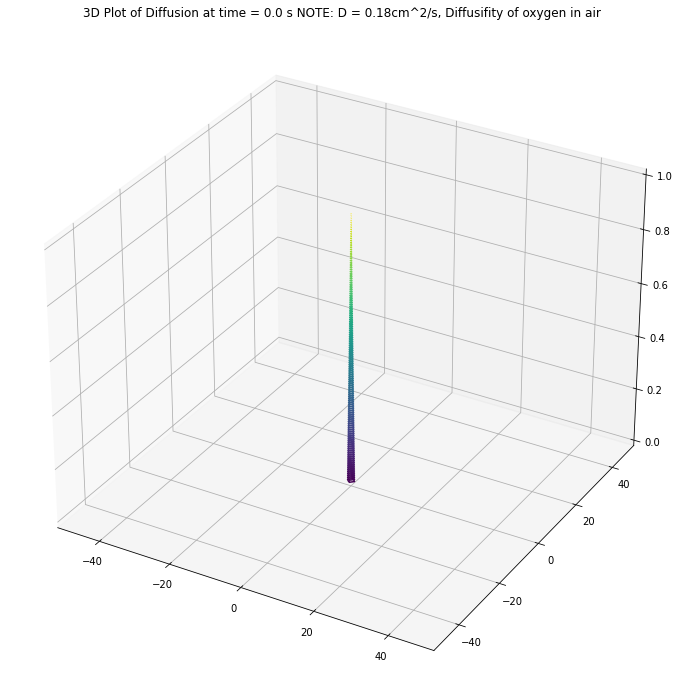

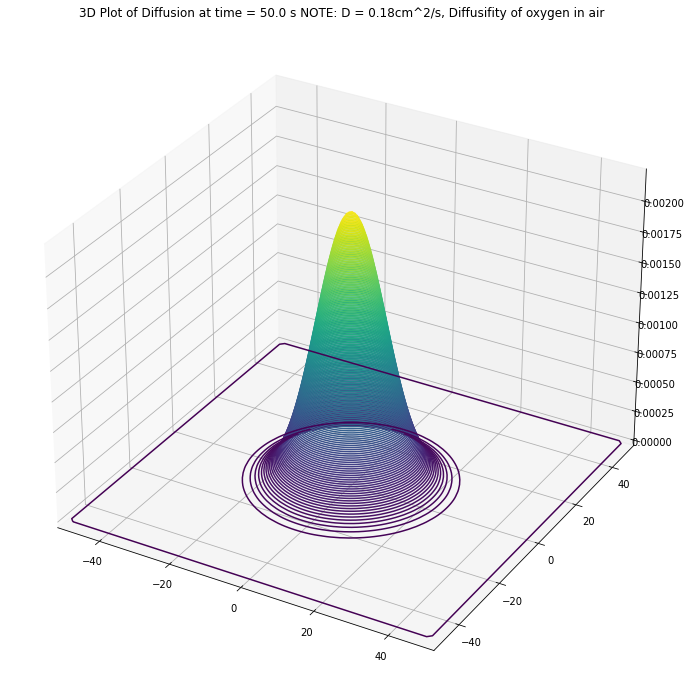

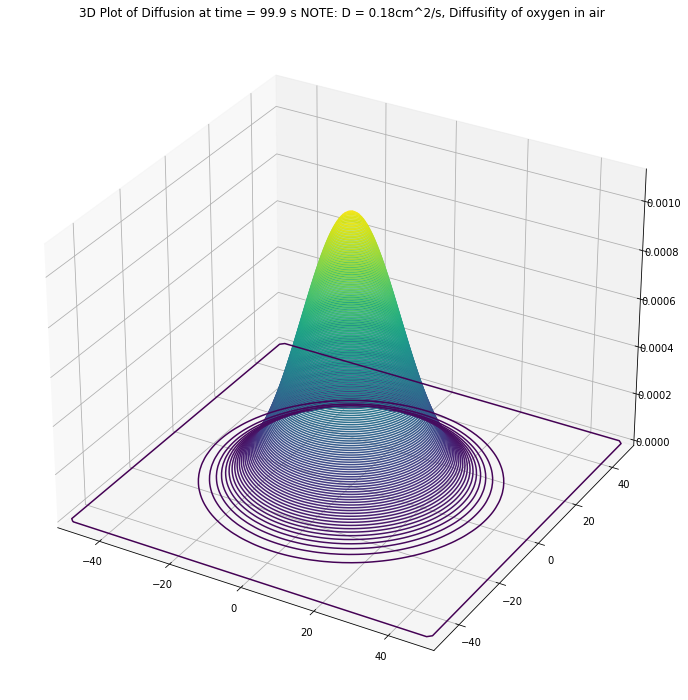

In [224]:
x,y, u = Diffusion(M = 100, N = 1000, xf = 50.0, tf = 100.0, D = 0.18, contour3D = True, plot = True)

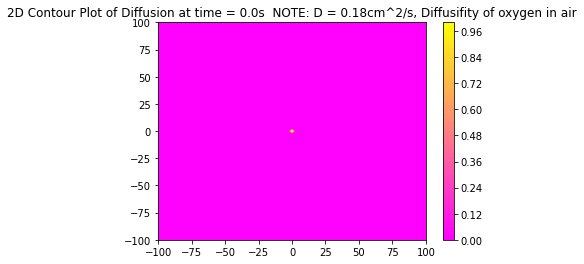

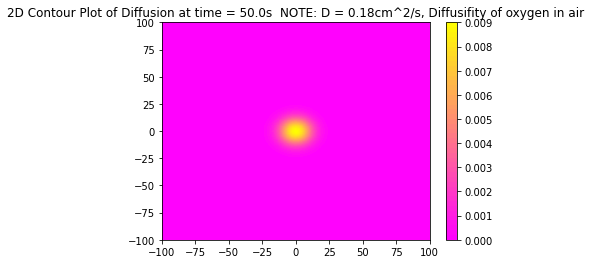

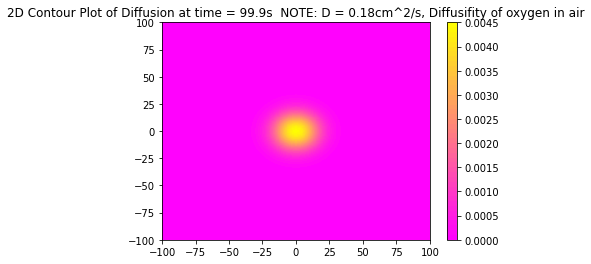

In [225]:
#lets now plot the regular contour plots
x, y, u  = Diffusion(M = 100, N = 1000, xf = 100.0, tf = 100.0, D = 0.18, contour3D = False, plot = True )

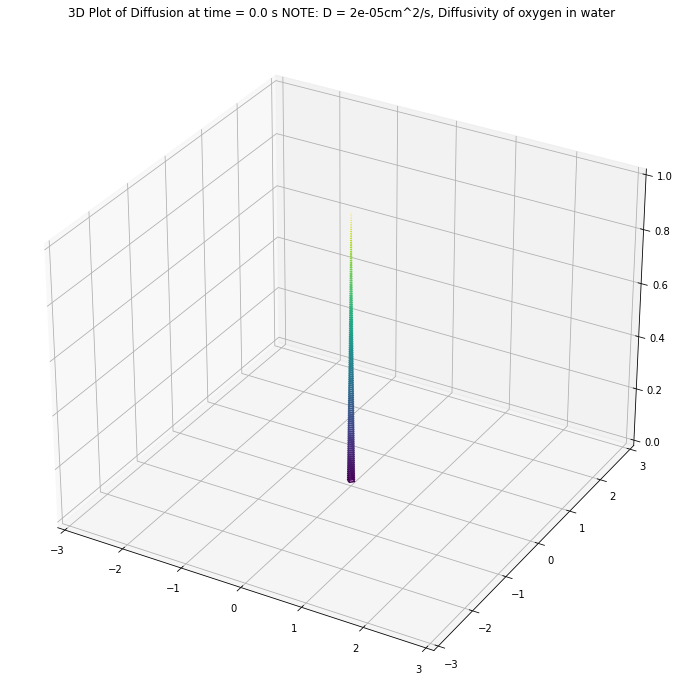

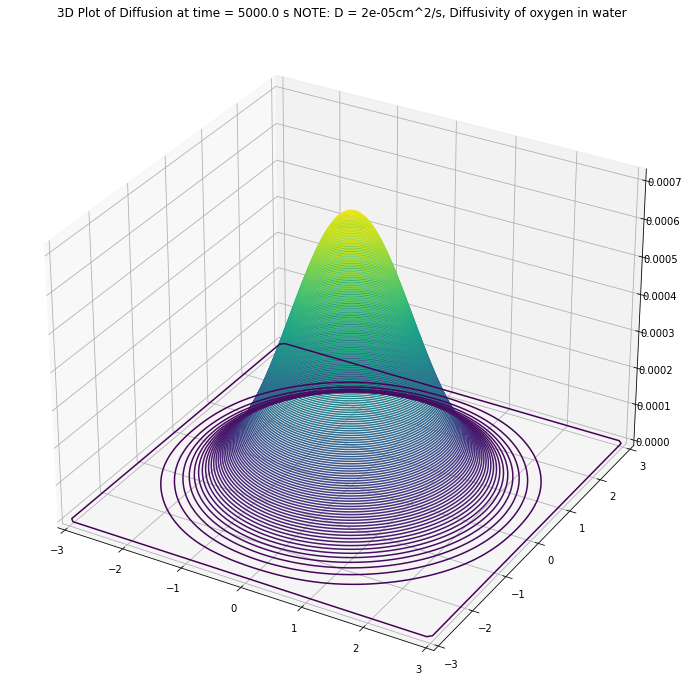

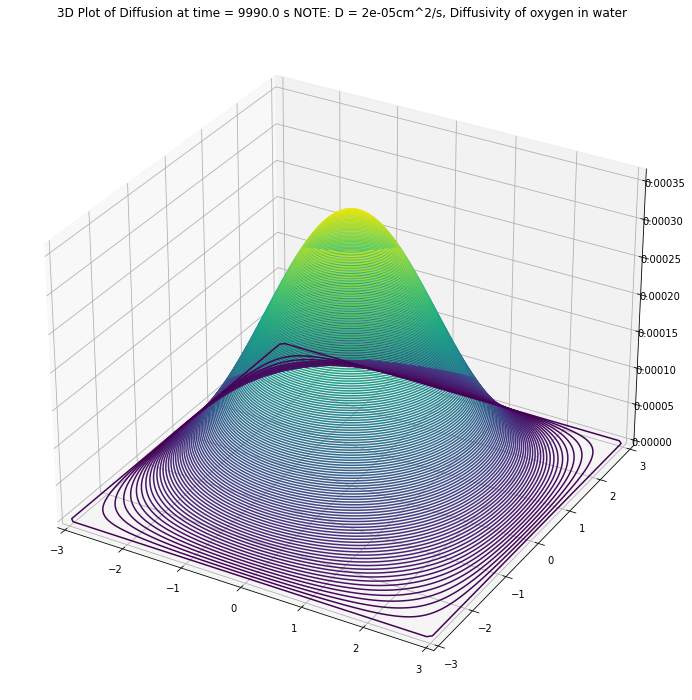

In [226]:
#lets now plot the regular contour plots BUT with new Diffusion coefficent!
x,y,u = Diffusion(M = 100, N = 1000, xf = 3, tf = 10000.0, D = 2*10**(-5), contour3D = True, plot  = True)

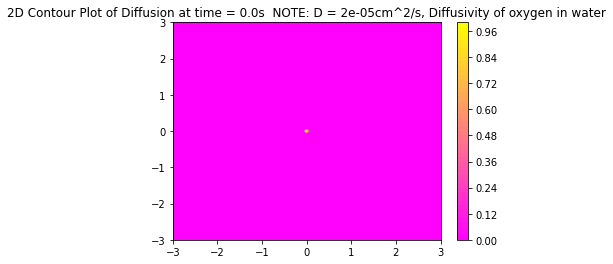

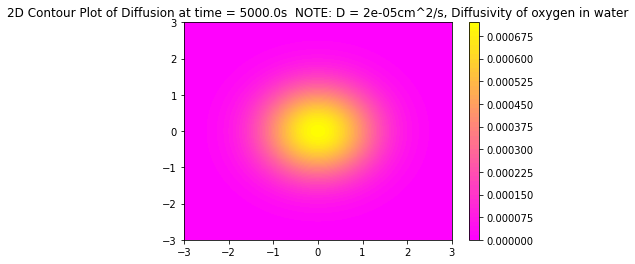

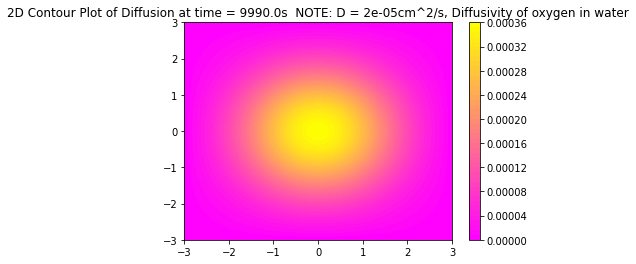

In [227]:
x,y,u = Diffusion(M = 100, N = 1000, xf = 3, tf = 10000.0, D = 2*10**(-5), contour3D = False, plot  = True)

"NOTE: TIME SCALES ARE IMPORTANT. DIRECT ATTENION TO THE TITLES."

Does this behavior look right? 

Well, what we know about this problem are the inital and boundary conditions. Initially the particles are forced into a delta function at the center of our computational grid. The boundary conditions are then zeros at '$\infty$' or the edge of our computational domain. 

We saw in class that the anzats for the 2D diffusion equation with these intial/boundary conditions is a **GUASSIAN!** So in 2-Dimensions this solution looks correct. 

We can also check by looking at the height of the function. Particulary in the 3D plots above, we see that as time passes the particles begin to diffuse. But, diffusion is about a probability per number of particles. So we want to see the height of our function decrease as the width of the guassian grows. So that the voulme of our object will always integrate to one.

Now, for each case extend your code to compute $<\vec{r}>$ and <$r^2$> as functions of time. Do your results make sense? 

What do we expect? 

In [217]:
x_ax,y_ax, u_vals = Diffusion(M = 100, N = 1000, xf = 100.0, tf = 100.0, D = 0.18, contour3D = True, plot = False )

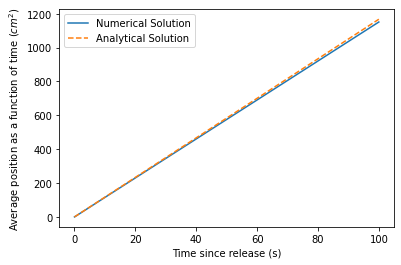

In [218]:
N = 1000 #this represents the number of timesteps that I can change for the diffusivity
M = 100 #this represents the number of position steps 

tf = 100.0 #final physical time


#this is the code to find the <r^2>. 
integral1_solution = np.zeros(N)
integral2_solution = np.zeros(N)


r_average1 = np.zeros((M + 1, M + 1))
r_average2 = np.zeros((M + 1, M + 1))

#lets extract every 2D array at each time slice 
for t in range(N): 
    for j in range(M):
        X_S = ((x_ax**2)*u_vals[:,j,t])
        r_average1[:,j] = X_S
    
    integral1  = simps(simps(r_average1, x_ax),y_ax)
    integral1_solution[t] =  integral1


for t in range(N): 
    for i in range(M):
        Y_S = ((y_ax**2)*u_vals[i,:,t])
        r_average2[i,:] = Y_S
        
    integral2 = simps(simps(r_average2, y_ax), x_ax)
    integral2_solution[t] = integral2

av_position  = integral1_solution +  integral2_solution 

True_solution = 16*np.pi*1.29*0.18*np.linspace(0,tf,N) 

plt.figure()
plt.plot(np.linspace(0,tf,N),av_position, label = 'Numerical Solution')
plt.plot(np.linspace(0,tf,N), True_solution, label = 'Analytical Solution', linestyle = 'dashed')
plt.ylabel(r'Average position as a function of time ($cm^2$)')
plt.xlabel('Time since release (s)')
plt.legend()
plt.show()


##I missing a pi and some other shit for scaling the analytical solution

**NOTE: I AM MISSING FACTORS OF PI AND SOME OTHER STUFF, I DO NOT KNOW WHAT THIS IS it is contained in A and B factos from the problem set. I assume this should be right.**

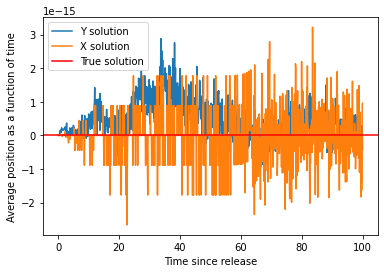

In [219]:
N = 1000 #this represents the number of timesteps that I can change for the diffusivity
M = 100

tf = 100.0


#this is the code to find the <r^2>. 
integralX_solution = np.zeros(N)
integralY_solution = np.zeros(N)


r_average1 = np.zeros((M + 1, M + 1))
r_average2 = np.zeros((M + 1, M + 1))

#lets extract every 2D array at each time slice 
for t in range(N): 
    for j in range(M):
        X_S = (x_ax)*u_vals[:,j,t]
        r_average1[:,j] = X_S
        integral1  = simps(simps(r_average1, y_ax), x_ax)
        integralX_solution[t] =  integral1


for t in range(N): 
    for i in range(M):
        Y_S = (y_ax)*u_vals[i,:,t]
        r_average2[i,:] = Y_S
        integral2 = simps(simps(r_average2, y_ax), x_ax)
        integralY_solution[t] = integral2




plt.figure()
plt.title(r'')
plt.plot(np.linspace(0,tf,N),integralY_solution,label = 'Y solution')
plt.plot(np.linspace(0,tf,N),integralX_solution, label = 'X solution')
plt.axhline(0,color = 'red', label = 'True solution')
plt.legend()
plt.ylabel('Average position as a function of time')
plt.xlabel('Time since release')
plt.show()

The red and blue curves are the ones that represent my numerical solutions. These should be exactly like the red line, but I believe the error in scipys simpson rule is causing some, but small deviations. (10^-15)

In [220]:

M=100  #M = number of position steps,
N=10000 # N = number of time steps


tf=10000.0 #final time I will go to in my FTCS method

dt=tf/N   #time step size

xf= 100 #length of my rod, this was supposed to be 1 meter, but it did not work with the stability condition

x=np.linspace(0,xf,M+1) #this is for plotting my rod

dx=xf/M   #position step size
D= 0.3 #thermal diffusivity of rod approx
eta=D*dt/dx**2   #eta<0.5 is stable

def temp_profile():

  #initializing solutions array 
  T=np.zeros([M+1,N+1],float)

  #intital conditions
  T[:,0]=20

  #boundary conditions
  T[0, :] = 0
  T[-1,:] = 50


  #1D FTCS routine for heat conduction/diffusion
  for j in range(1,N):
    for i in range(1,M):
      T[i,j]=T[i,j-1]+eta*(T[i+1,j-1]+T[i-1,j-1]-2.0*T[i,j-1])
  
  return T


def plot_profile(T):
    for timeslice in [0,1000,4000]:

        plt.plot(x,T[:,timeslice],color = 'red')
        plt.title(f'Temperature Profile along the rod at time = {timeslice} s')
        plt.xlabel('Length of Rod (cm)')
        plt.ylabel(r'Temperature of rod $\degree{C}$')
        plt.show()

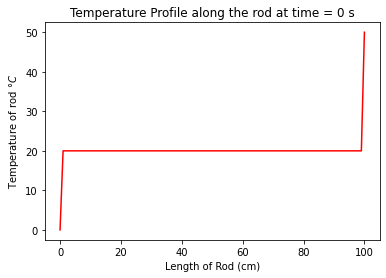

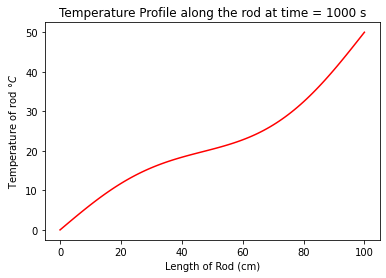

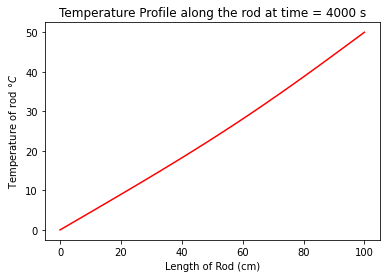

'NOTE: These plots represent T(x, t = some fixed time)'

In [221]:
#creating an instance of my temperature profile
T =  temp_profile()

#lets plot our temperature profile using the 1D FTCS, HEAT transfer
plot_profile(T)

'NOTE: These plots represent T(x, t = some fixed time)'

**QUESTION: 8**

This One Dimensional rod is set to be in two large reservouirs. The three plots above are representing time evolution, we see that as time evolves the rod attempts to equillibrate in a linear fashion. 

YES! This mathces with our analytical predition at long time scales!

